# **Lab Exercise 7: Text Classification using RNN**

## Name: Vishwa R
## Reg. No: 21BAI1772

#Import Libraries

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import precision_score, recall_score, f1_score

#Load and Preprocess Data

In [9]:
# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=100000)

# Pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


#Model Training and Evaluation

#RNN (Recurrent Neural Network) Model

In [14]:
# Define RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=100000, output_dim=128, input_length=500))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

In [15]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
# Display model summary
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 128)          12800000  
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12805185 (48.85 MB)
Trainable params: 12805185 (48.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Train the model
history_rnn = model_rnn.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/3
157/157 [==============================] - 38s 245ms/step - loss: 0.0191 - accuracy: 0.9975 - val_loss: 0.8404 - val_accuracy: 0.6866
Epoch 2/3
157/157 [==============================] - 39s 245ms/step - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.8944 - val_accuracy: 0.6818
Epoch 3/3
157/157 [==============================] - 38s 242ms/step - loss: 0.0041 - accuracy: 0.9999 - val_loss: 0.9339 - val_accuracy: 0.6794


In [25]:
# Evaluate the model
y_pred_rnn = model_rnn.predict(x_test).ravel()
y_pred_binary_rnn = (y_pred_rnn > 0.5).astype(int)

precision_rnn = precision_score(y_test, y_pred_binary_rnn)
recall_rnn = recall_score(y_test, y_pred_binary_rnn)
f1_rnn = f1_score(y_test, y_pred_binary_rnn)
print(f"RNN Model - Precision: {precision_rnn:.2f}, Recall: {recall_rnn:.2f}, F1 Score: {f1_rnn:.2f}")

782/782 [==============================] - 19s 25ms/step
RNN Model - Precision: 0.67, Recall: 0.69, F1 Score: 0.68


#GRU (Gated Recurrent Unit) Model

In [26]:
# Define GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=100000, output_dim=128, input_length=500))
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation='sigmoid'))

In [27]:
# Compile the model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Display model summary
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 128)          12800000  
                                                                 
 gru_2 (GRU)                 (None, 32)                15552     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12815585 (48.89 MB)
Trainable params: 12815585 (48.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Train the model
history_gru = model_gru.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/3
157/157 [==============================] - 55s 338ms/step - loss: 0.5006 - accuracy: 0.7423 - val_loss: 0.3365 - val_accuracy: 0.8584
Epoch 2/3
157/157 [==============================] - 52s 331ms/step - loss: 0.2150 - accuracy: 0.9172 - val_loss: 0.3098 - val_accuracy: 0.8802
Epoch 3/3
157/157 [==============================] - 52s 330ms/step - loss: 0.1042 - accuracy: 0.9658 - val_loss: 0.3782 - val_accuracy: 0.8750


In [30]:
# Evaluate the model
y_pred_gru = model_gru.predict(x_test).ravel()
y_pred_binary_gru = (y_pred_gru > 0.5).astype(int)

precision_gru = precision_score(y_test, y_pred_binary_gru)
recall_gru = recall_score(y_test, y_pred_binary_gru)
f1_gru = f1_score(y_test, y_pred_binary_gru)

print(f"GRU Model - Precision: {precision_gru:.2f}, Recall: {recall_gru:.2f}, F1 Score: {f1_gru:.2f}")

782/782 [==============================] - 27s 34ms/step
GRU Model - Precision: 0.85, Recall: 0.87, F1 Score: 0.86


#LSTM (Long Short-Term Memory) Model

In [31]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=100000, output_dim=128, input_length=500))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

In [32]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Display model summary
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 128)          12800000  
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12820641 (48.91 MB)
Trainable params: 12820641 (48.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Train the model
history_lstm = model_lstm.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/3
157/157 [==============================] - 59s 365ms/step - loss: 0.4618 - accuracy: 0.7826 - val_loss: 0.3222 - val_accuracy: 0.8730
Epoch 2/3
157/157 [==============================] - 57s 360ms/step - loss: 0.2008 - accuracy: 0.9255 - val_loss: 0.3309 - val_accuracy: 0.8520
Epoch 3/3
157/157 [==============================] - 57s 363ms/step - loss: 0.0905 - accuracy: 0.9722 - val_loss: 0.3567 - val_accuracy: 0.8730


In [35]:
# Evaluate the model
y_pred_lstm = model_lstm.predict(x_test).ravel()
y_pred_binary_lstm = (y_pred_lstm > 0.5).astype(int)

precision_lstm = precision_score(y_test, y_pred_binary_lstm)
recall_lstm = recall_score(y_test, y_pred_binary_lstm)
f1_lstm = f1_score(y_test, y_pred_binary_lstm)

print(f"LSTM Model - Precision: {precision_lstm:.2f}, Recall: {recall_lstm:.2f}, F1 Score: {f1_lstm:.2f}")

782/782 [==============================] - 32s 40ms/step
LSTM Model - Precision: 0.84, Recall: 0.89, F1 Score: 0.87


#Tabulation of results

In [50]:
# Results from the RNN, GRU, and LSTM models
rnn_results = pd.DataFrame({
    'Model': ['RNN Model (32 units)', 'GRU Model (32 units)', 'LSTM Model (32 units)'],
    'Precision': [round(precision_rnn, 2), round(precision_gru, 2), round(precision_lstm, 2)],
    'Recall': [round(recall_rnn, 2), round(recall_gru, 2), round(recall_lstm, 2)],
    'F1 Score': [round(f1_rnn, 2), round(f1_gru, 2), round(f1_lstm, 2)]
})

In [51]:
rnn_results

,Model,Precision,Recall,F1 Score
0,RNN Model (32 units),0.67,0.69,0.68
1,GRU Model (32 units),0.85,0.87,0.86
2,LSTM Model (32 units),0.84,0.89,0.87


###- RNN: Performs the least effectively among the three models, with lower scores in all metrics as vasic RNNs have limitations in handling long-term dependencies.

###- GRU: Performs well with high recall and good balance, making it strong in correctly identifying positive samples. GRUs improve on RNNs with gating mechanisms that manage the flow of information as resulted in the increase in the results

###- LSTM: Improve on GRUs with their more sophisticated architecture allowing for effective learning of long-term dependencies. Best overall, especially in capturing positive samples (high recall) and balancing precision and recall (high F1 score)


#Comparing RNN models with CNN models

In [45]:
# Define results for CNN models
cnn_results = pd.DataFrame({
    'Model': ['CNN Model 1', 'CNN Model 2', 'CNN Model 3'],
    'Precision': [0.89, 0.81, 0.80],
    'Recall': [0.85, 0.86, 0.87],
    'F1 Score': [0.87, 0.84, 0.83]
})

# Combine results
all_results = pd.concat([cnn_results, rnn_results], ignore_index=True)
all_results

,Model,Precision,Recall,F1 Score
0,CNN Model 1,0.89,0.85,0.87
1,CNN Model 2,0.81,0.86,0.84
2,CNN Model 3,0.80,0.87,0.83
3,RNN Model (32 units),0.67,0.69,0.68
4,GRU Model (32 units),0.85,0.87,0.86
5,LSTM Model (32 units),0.84,0.89,0.87


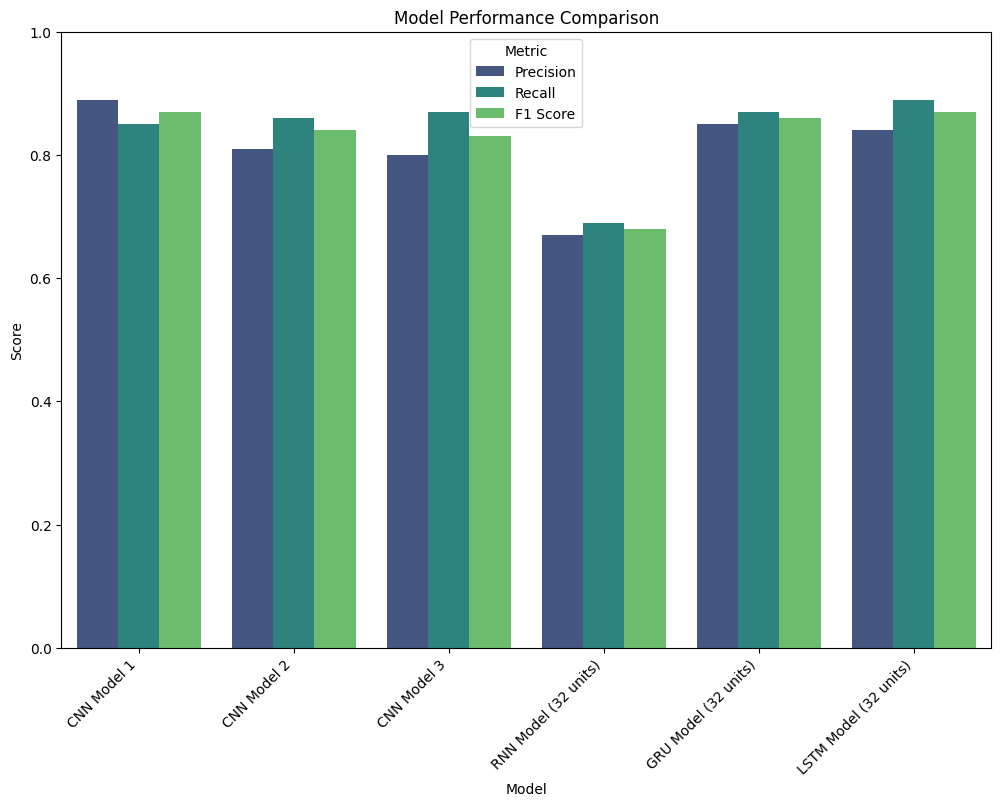

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine CNN and RNN results
all_results = pd.concat([cnn_results, rnn_results], ignore_index=True).round(2)

# Create a bar plot
melted_results = all_results.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_results, palette='viridis')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()


#Inference

- CNNs tend to do well in precision, which means they are better at correctly identifying positive instances out of all positive predictions. See the first CNN model, it gives precision of 0.89 (highest precision out of the 6).
- RNNs, particularly GRUs and LSTMs, show stronger performance in recall and F1 scores, indicating they are better at capturing and remembering sequences and contexts, and have a better balance between precision and recall.
- However, RNNs alone won't do it, we need gated mechanisms to better capture long term dependencies.